In [2]:
# Create a pymatgen Structure for NaCl
from pymatgen.core import Structure, Lattice
from vasppy.rdf import RadialDistributionFunction
import matplotlib as mpl
import matplotlib.pyplot as plt
from figure_formatting import figure_formatting as ff
import numpy as np
ff.set_formatting()

This notebook calculates the static fluorine model part of figure S4 and functions in the same way as the seconf half of the structural characterisation notebook.

In [3]:
pmgs=[]
for l in range(101,5651,50):
    pmgs.append(Structure.from_file("Static_strucutures/Sys"+str(l)+"/CONTCAR"))


In [4]:
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')
rdf_ff = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='F')

rdf_snsn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Sn', species_j='Sn')
rdf_basn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Ba', species_j='Sn')
rdf_baba = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                              species_i='Ba', species_j='Ba')



np.savetxt('STATIC_rdf_snf',[rdf_snf.r,rdf_snf.rdf])
np.savetxt('STATIC_rdf_baf',[rdf_baf.r,rdf_baf.rdf])
np.savetxt('STATIC_rdf_snsn',[rdf_snsn.r,rdf_snsn.rdf])
np.savetxt('STATIC_rdf_basn',[rdf_basn.r,rdf_basn.rdf])
np.savetxt('STATIC_rdf_baba',[rdf_baba.r,rdf_baba.rdf])

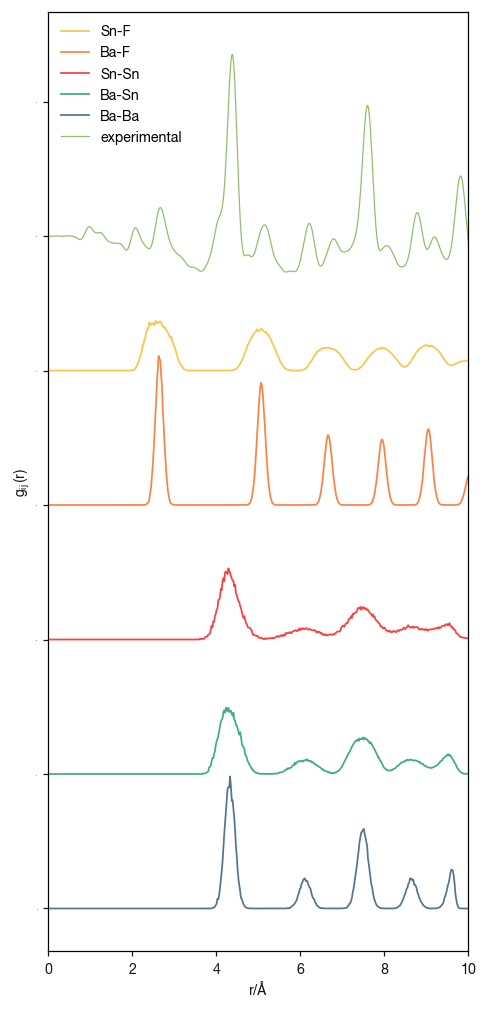

In [5]:
plt.figure(figsize=(4,8))

rdf_baba=np.loadtxt('STATIC_rdf_baba')
rdf_snsn=np.loadtxt('STATIC_rdf_snsn')
rdf_basn=np.loadtxt('STATIC_rdf_basn')
rdf_snf=np.loadtxt('STATIC_rdf_snf')
rdf_baf=np.loadtxt('STATIC_rdf_baf')
plt.plot(rdf_snf[0,:], rdf_snf[1,:]+40, label='Sn-F',c='#F9C74F',linewidth=1)
plt.plot(rdf_baf[0,:], rdf_baf[1,:]+30, label='Ba-F',c='#F9844A',linewidth=1)

plt.plot(rdf_snsn[0,:], rdf_snsn[1,:]+20, label='Sn-Sn',c='#F94144',linewidth=1)
plt.plot(rdf_basn[0,:], rdf_basn[1,:]+10, label='Ba-Sn',c='#43AA8B',linewidth=1)
plt.plot(rdf_baba[0,:], rdf_baba[1,:], label='Ba-Ba',c='#577590',linewidth=1)
PDF=np.loadtxt('d250_DD-20Apr2021_08-000000_tif_A0.gr',skiprows=27)
plt.plot(PDF[:,0],PDF[:,1]*5+50,c='#90BE6D',label='experimental')
plt.legend()

plt.xlim(0,10)
plt.xlabel(r'$r/ \operatorname{\AA}$')
plt.ylabel(r'$g_{\operatorname{ij}}(r)$')
plt.tight_layout()
plt.tick_params(labelsize=0,axis='y')

plt.savefig('STATICallrdf.pdf')